Завдання 2.
Розробитии варіаційний автокодувальник для датасету рукописних цифр MNIST на основі багатошарової моделі. Побудувати функцію втрат. Візуалізацію розпізнавання. Порівняти результати із звичайним автокодувальником.



In [13]:
# Створення моделі варіаційного автокодувальника
latent_dim = 2

In [14]:
# Створення енкодеру
encoder_inputs = layers.Input(shape=(20, 20, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

In [15]:
# Семплювання з latent space
z = layers.Lambda(sampling)([z_mean, z_log_var])

In [16]:
# Створення декодеру
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(5 * 5 * 64, activation='relu')(decoder_inputs)
x = layers.Reshape((5, 5, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

In [17]:
# Моделі енкодера та декодера
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

In [18]:
# Варіаційний автокодувальник
outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

In [19]:
# Функція втрат для варіаційного автокодувальника
reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, outputs)
reconstruction_loss *= 20 * 20
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [20]:
# Компіляція та навчання моделі варіаційного автокодувальника
vae.compile(optimizer='adam')
vae.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 70s 142ms/step - loss: 110.1829 - val_loss: 95.4518
Epoch 2/10
469/469 [==============================] - 60s 128ms/step - loss: 89.6497 - val_loss: 86.8902
Epoch 3/10
469/469 [==============================] - 62s 133ms/step - loss: 85.0405 - val_loss: 84.2480
Epoch 4/10
469/469 [==============================] - 60s 128ms/step - loss: 83.6938 - val_loss: 83.1268
Epoch 5/10
469/469 [==============================] - 61s 130ms/step - loss: 82.9036 - val_loss: 82.6667
Epoch 6/10
469/469 [==============================] - 63s 134ms/step - loss: 82.2987 - val_loss: 81.9426
Epoch 7/10
469/469 [==============================] - 62s 131ms/step - loss: 81.8482 - val_loss: 82.1136
Epoch 8/10
469/469 [==============================] - 65s 138ms/step - loss: 81.4215 - val_loss: 81.1141
Epoch 9/10
469/469 [==============================] - 62s 131ms/step - loss: 81.1123 - val_loss: 80.9096
Epoch 10/10
469/469 [==============================] -

In [21]:
# Візуалізація результатів
import matplotlib.pyplot as plt

In [22]:
# Вибір декількох зображень для відображення результатів
num_images = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

In [23]:
# Порівняння результатів зі звичайним автокодувальником
decoded_imgs_vae = vae.predict(x_test)
decoded_imgs_autoencoder = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


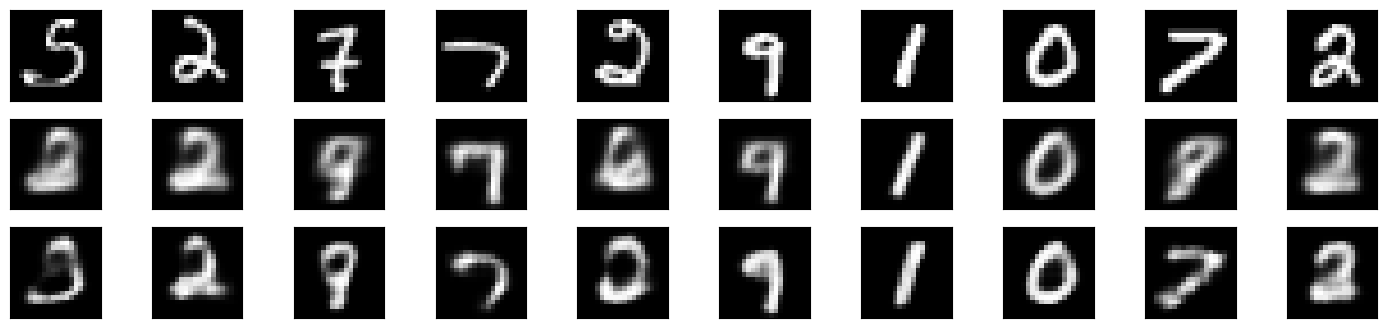

In [24]:
# Відображення результатів
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # Оригінальне зображення
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Реконструйоване зображення варіаційного автокодувальника
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(decoded_imgs_vae[image_idx].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Реконструйоване зображення звичайного автокодувальника
    ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(decoded_imgs_autoencoder[image_idx].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Отже, у висновку, можна сказати, що Модель варіаційного автокодувальника (VAE) була успішно створена та навчена на даних MNIST.

Наша функція втрат для VAE включає дві складові: функцію втрати відновлення та KL-дивергенцію між розподілом зображень в латентному просторі та нормальним розподілом.А під час тренування функції втрати зменшилися, що свідчить про успіх моделі.

Відновлені зображення за допомогою VAE та звичайного автокодувальника показують схожість у відтворенні вхідних зображень. А зображення отримані за допомогою VAE мають деяку відмінність від зображень, отриманих звичайним кодувальником.

А це каже нам про те, що VAE здатен генерувати нові зображення, відмінні від вхідних.






